 
# Classification of Delhi Metro stations.
<img src='https://upload.wikimedia.org/wikipedia/commons/6/65/Delhi_Metro_logo.svg' style="width: 150px;"/>

## Introduction

Delhi Metro is a rapid transit system serving Delhi and its satellite cities in the National Capital Region of India. As of now, there are a total of 229 metro stations including the Airport Express stations. The first section of the Delhi Metro opened on 25 December 2002 with the Red Line,[2] and has since been expanded to around 347.66 km(216.03 miles) of route length as of 4 October 2019. The network has nine operational lines and is built and operated by the Delhi Metro Rail Corporation Limited (DMRC). The Delhi Metro Rail Corporation makes 2,700 trips per day carrying 1.5 million passengers, who on an average travel a distance of 17 kilometres each.

For this project, we will try to look at the places surrounding these metro stations and classify them accordng to the similarity of nearby venues. Every one use metro transit to migrate from one place to another for reasons which can be personal of professional. If there are more professional places like companies, offices surrounding a station then it will mostly be used by working professionals. Then there are some stations with many unversities or colleges nearby and is used by Students mostly. Stations which have places like amusement parks, malls, monuments are used by people for recreation. 

We can classify stations by primary usage analyzing the data that contains the number of nearby venues according to their category. This can help plan further extension of the network and find places for new development.

## Data

In this section we will describe our base data which we will analyze to reach the goal we want. 

Let us import some of the libraries that we will be required to move further in the project.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim 
# convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Because we are working on the data that is based on places. It will be great to visualize using a world map. Since, our project revolves around the National Capital of India, Delhi. We wil visualize a simple map of delhi using folium library.

We will require the Latitude and Longitude of Delhi to focus it on the map. To get these coordinates we use geopy.geocoders that can perform geocoding of the given Address.

In [2]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [3]:
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=11)  
map_delhi.save(outfile= "test_map.html")
map_delhi

Now we will need a data that will contain the list of all the metro stations under DMRC in Delhi. For this we will use this url

https://en.wikipedia.org/wiki/List_of_Delhi_Metro_stations

We have to scrape the relevant table data from this url like Station name, Line. 

#### Assumption :-
- There are some stations with more than one line that pass through it. So we have assumed that only the line that is written first on the above url will be the data of our choice to nullify the ambiguity that we may face while plotting on the graph.

In [4]:
from bs4 import BeautifulSoup

wiki_url = 'https://en.wikipedia.org/wiki/List_of_Delhi_Metro_stations'
wiki_page = requests.get(wiki_url).text
wiki_doc = BeautifulSoup(wiki_page, 'lxml')

rows = wiki_doc.find('table', {'class': 'wikitable sortable'}).findAll('tr')


df = pd.DataFrame()
 


lst = []
form = '{ "name": "%s",\
          "details": {"line":"[%s]",\
                      "latitude":0.0,\
                      "longitude":0.0 }}'
Station=[]
Line = []
for row in rows[1:]:
    items = row.find_all('td')
    try:
        if len(items)==8:
            Station.append(items[0].find('a').contents[0])
            Line.append(items[2].find('a').find('span').find('b').contents[0])
            lst.append(form % (items[0].find('a').contents[0],
               items[2].find('a').find('span').find('b').contents[0]))
    
    except Exception as e:
        continue

string = '['+','.join(lst)+']'

data = json.loads(string)

f = open('metro.json', 'w+')
f.write(json.dumps(data, indent=4))
f.close()

In [5]:
print(len(Station))
print(len(Line))

228
228


Adding the stations and Corresponding Line to the empty dataframe that we have made above with the name 'df'.

In [6]:
df['Station']=Station
df['Line']=Line
df

,Station,Line
0,Adarsh Nagar,Yellow Line
1,AIIMS,Yellow Line
2,Akshardham,Blue Line
3,Anand Vihar ISBT,Blue Line branch
4,Arjan Garh,Yellow Line
5,Arthala,Red Line
6,Ashok Park Main,Green Line
7,Ashram,Pink Line
8,Azadpur,Yellow Line
9,Badarpur Border,Violet Line


Now that we have all the station and lines in our dataframe but we will need to use their coordinates that are unique to them and can be used to plot each station on the map.

Again we will use the geocoder to get the corresponsing latitude and longitude value of all station. 

#### Assumption
- While using the address there are few shortcomings like there can be more than one address with same name. for example 'Gandhinagar' is in Gujarat as well as in Delhi. so we have to use few try except blocks that will search for the place with more accuracy to less accuracy. 
- If we dont find the coordinates even after this we have used None as lat. and long. values. Store them in two list and then update in the dataframe

In [7]:
Latitude = []
Longitude = []
for stat in Station:
    try:
        try:
            try:
                address = "{} metro station, Delhi, India".format(stat)
                geolocator = Nominatim(user_agent="ny_explorer")
                location = geolocator.geocode(address)
                lat = location.latitude
                long = location.longitude
            except Exception as e:
                address = "{}, Delhi, India".format(stat)
                geolocator = Nominatim(user_agent="ny_explorer")
                location = geolocator.geocode(address)
                lat = location.latitude
                long = location.longitude
        except Exception as e:
            address = "{}, India".format(stat)
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode(address)
            lat = location.latitude
            long = location.longitude
    except Exception as d:
        lat=None
        long=None
    Latitude.append(lat)
    Longitude.append(long)

In [ ]:
df['Latitude'] = Latitude
df['Longitude'] = Longitude
df.head(20)

In [8]:
# df.to_csv('DELHI_METRO_DATA.csv',index=False)
df=pd.read_csv('DELHI_METRO_DATA.csv')
df

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow Line,28.714401,77.167288
1,AIIMS,Yellow Line,28.566860,77.207806
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line branch,28.646753,77.318004
4,Arjan Garh,Yellow Line,28.480735,77.125762
5,Arthala,Red Line,28.676999,77.391892
6,Ashok Park Main,Green Line,28.671604,77.155291
7,Ashram,Pink Line,28.572423,77.258598
8,Azadpur,Yellow Line,28.707657,77.175547
9,Badarpur Border,Violet Line,28.490500,77.304038


Converting all the line with a integer value so that we can use it easily.
- Blue line and Green line diverge or branch so simplicity we have taken them as the same line.

In [9]:
linetonum = {"Yellow Line": 1, "Red Line": 2,"Blue Line": 3,'Blue Line branch':3, "Pink Line": 4,"Magenta Line": 5, "Green Line": 6,'Green Line branch':6, "Violet Line": 7, "Orange Line": 8,"Grey Line": 9}

Our data contains few NaN values for which our code was unable to find the coordinates value so we have remove their rows. But you can also replace them with coordinated found from web.

In [10]:
data = df.dropna(axis=0)
data

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,Yellow Line,28.714401,77.167288
1,AIIMS,Yellow Line,28.566860,77.207806
2,Akshardham,Blue Line,28.617842,77.279488
3,Anand Vihar ISBT,Blue Line branch,28.646753,77.318004
4,Arjan Garh,Yellow Line,28.480735,77.125762
5,Arthala,Red Line,28.676999,77.391892
6,Ashok Park Main,Green Line,28.671604,77.155291
7,Ashram,Pink Line,28.572423,77.258598
8,Azadpur,Yellow Line,28.707657,77.175547
9,Badarpur Border,Violet Line,28.490500,77.304038


In [11]:
data.replace({"Line": linetonum},inplace=True)
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.714401,77.167288
1,AIIMS,1,28.566860,77.207806
2,Akshardham,3,28.617842,77.279488
3,Anand Vihar ISBT,3,28.646753,77.318004
4,Arjan Garh,1,28.480735,77.125762
5,Arthala,2,28.676999,77.391892
6,Ashok Park Main,6,28.671604,77.155291
7,Ashram,4,28.572423,77.258598
8,Azadpur,1,28.707657,77.175547
9,Badarpur Border,7,28.490500,77.304038


For a clear visualization we have used the line with their actual color in hexadecimal code. For example, Station on 'Red Line' will be marked with red color. 

In [12]:
colors_dict = {1:'#FFFF00', 2:'#FF0000',3:'#0000FF', 4:'#FFC0CB',5:'#FF00FF', 6:'#008000',7:'#EE82EE', 8:'#FFA500',9:'#808080'} 

Using the code to get coordinate of Delhi.

In [13]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


Plotting the map with all stations marked with corresponding line color using folium library.

In [14]:
map_delhi_metro = folium.Map(location=[latitude, longitude], zoom_start=10)

for line, station, lat,long in zip(data['Line'], data['Station'],data['Latitude'], data['Longitude']):
    folium.Circle(
        [lat,long],
        popup=station,
        radius=20,
        color=colors_dict[line]
    ).add_to(map_delhi_metro)
map_delhi_metro.save(outfile= "outlier_map.html")
map_delhi_metro

Zooming out the map will give us a outlier whose error in getting coordinates is very high. We can see that station named 'Lal Qila' is plotted near Telangana state so we will correct it by using the real coordinate dof located using map and replacing the value.

In [15]:
data.at[97,'Latitude'] = 28.656682
data.at[97,'Longitude'] = 77.236612
data


,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.714401,77.167288
1,AIIMS,1,28.566860,77.207806
2,Akshardham,3,28.617842,77.279488
3,Anand Vihar ISBT,3,28.646753,77.318004
4,Arjan Garh,1,28.480735,77.125762
5,Arthala,2,28.676999,77.391892
6,Ashok Park Main,6,28.671604,77.155291
7,Ashram,4,28.572423,77.258598
8,Azadpur,1,28.707657,77.175547
9,Badarpur Border,7,28.490500,77.304038


In [16]:
# Sort the rows of dataframe by column 'Line'
data_sort = data.sort_values(by ='Line' )
data_sort

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.714401,77.167288
46,Ghitorni,1,28.493751,77.149187
81,Jor Bagh,1,28.588239,77.216528
134,New Delhi,1,28.643641,77.221737
68,Jahangirpuri,1,28.725972,77.162658
61,INA,1,28.574408,77.210241
181,Samaypur Badli,1,28.744616,77.138265
180,Saket,1,28.524411,77.213725
60,IFFCO Chowk,1,28.472328,77.072422
177,Rohini Sector 18,1,28.738348,77.139832


In [17]:
data_sort.dtypes

Station       object
Line           int64
Latitude     float64
Longitude    float64
dtype: object

In [18]:
map_delhi_metro = folium.Map(location=[latitude, longitude], zoom_start=10)
#add markers
for line, station, lat,long in zip(data_sort['Line'], data_sort['Station'],data_sort['Latitude'], data_sort['Longitude']):
    folium.Circle(
        [lat,long],
        popup=station,
        radius=30,
        fill=True,
        color=colors_dict[line]
    ).add_to(map_delhi_metro)   

map_delhi_metro

Now we have a good visualiztion of each station and also we easily can trace the path of each line. 

# Methodology

We have the the data related to the metro station under DMRC, their latitudes and longitudes values with the line of Metro that passed through them.

For further processing we will be utilizing the **FOURSQUARE API** and explore the venues in a specific radius around that using their coordinates values.

We will use explore query under venues of the api calls. You can read more about the various Endpoints provided Foursquare api on the following link.
**https://developer.foursquare.com/docs/places-api/endpoints/**

__The advantage of using Foursquare api is that venues are classiied in particular categories which will make it easy to calculate the number of venues surround a given location for each category and that is actually the base of our classification.__

Make a account on Foursquare Developer portal and get your credentials below.
Make sure you do not share these values with anyone.

In [24]:
CLIENT_ID = 'Your Client ID'
CLIENT_SECRET = 'Your Client Secret'
VERSION = '20180605'

All the categories that i have mentioned has some unique id so we need to execute a api call to get all the valid categories with the unique id.

In [25]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [26]:
len(results['response']['categories'])

10

In [27]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


Now we need to define a function which will take latiude and longitude values to check the address and category_id for which we will we want the count of nearby venues.

In [21]:
def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                radius,
                categoryId)
    try:
        return requests.get(explore_url).json()['response']['totalResults']
    except Exception as e:
        return 0

Checking the progress of our data for a final time to make sure we are going in right direction

In [22]:
data_sort.reset_index(inplace=True,drop=True)
data_sort

,Station,Line,Latitude,Longitude
0,Adarsh Nagar,1,28.714401,77.167288
1,Ghitorni,1,28.493751,77.149187
2,Jor Bagh,1,28.588239,77.216528
3,New Delhi,1,28.643641,77.221737
4,Jahangirpuri,1,28.725972,77.162658
5,INA,1,28.574408,77.210241
6,Samaypur Badli,1,28.744616,77.138265
7,Saket,1,28.524411,77.213725
8,IFFCO Chowk,1,28.472328,77.072422
9,Rohini Sector 18,1,28.738348,77.139832


In [23]:
stations_venues_df = data_sort.copy()
for c in categories_list:
    stations_venues_df[c[0]] = 0


Calling the function to get all the count of nearby venues for each category for all station one by one and place them in a dataframe.

Note:-
- Here i may seem to start from 180 thats' because in Foursquare Regular acoount we can only call 950 per day and for our dataset we have 221 stations and 10 category for each station so i have run in several three days or you can use different accounts and just see from where you are going to see all 0 counts for each category.

In [33]:
for i, row in stations_venues_df[stations_venues_df.index > 179].iterrows():
    print(i)
    for c in categories_list:        
        stations_venues_df.loc[i, c[0]] = get_venues_count(stations_venues_df.Latitude.iloc[i],stations_venues_df.Longitude.iloc[i], radius=1000,categoryId=c[1])
    stations_venues_df.to_csv('stations_venues.csv')

180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220


In [19]:
stations_venues = pd.read_csv('stations_venues.csv', index_col=0)
stations_venues

,Station,Line,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Adarsh Nagar,1,28.714401,77.167288,1,1,0,8,1,1,5,1,20,4
1,Ghitorni,1,28.493751,77.149187,2,1,0,5,1,3,2,3,3,3
2,Jor Bagh,1,28.588239,77.216528,3,2,2,17,2,3,13,4,4,2
3,New Delhi,1,28.643642,77.221737,2,5,2,36,9,1,6,1,9,63
4,Jahangirpuri,1,28.725972,77.162658,0,1,0,2,0,1,4,1,13,3
5,INA,1,28.574408,77.210241,6,3,0,6,3,4,7,2,6,5
6,Samaypur Badli,1,28.744616,77.138265,0,0,0,2,0,0,4,0,11,3
7,Saket,1,28.524411,77.213725,8,10,1,48,20,4,13,6,51,12
8,IFFCO Chowk,1,28.472328,77.072422,7,2,2,30,10,4,18,5,8,7
9,Rohini Sector 18,1,28.738348,77.139832,0,0,0,2,0,2,3,1,8,3


In [37]:
stations_venues.shape

(221, 14)

#### Visualization and Modeling

Using a Box Plot to see the the distrubution of venue count for each category.

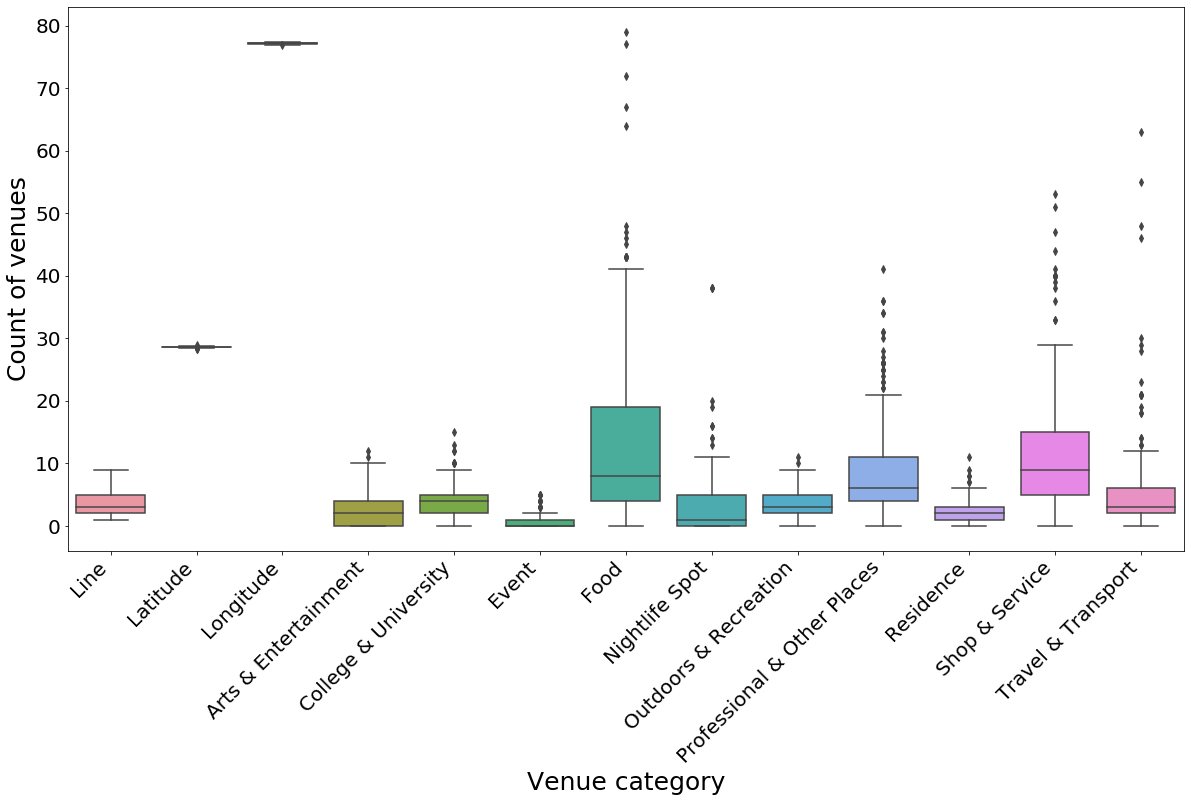

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = stations_venues)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

Ignoring the Latitude and Longitude and analysing the categories distribution we can see that most of the venues are in the category of Food, Professional places and Shops & Services. While others are comparitively less in number.

To make a good visualization let us Normalize the data so that every cell value will be in between 1 and 0 using the MinMaxScaler and removing the Latitude and longitude column through slicing.

In [32]:
from sklearn.preprocessing import MinMaxScaler

X = stations_venues.values[:,4:]
cluster_dataset = MinMaxScaler().fit_transform(X)

Now we need to define a dataframe that we will use for clustering using the normalized value. 

Note: We use the Normalize Venues count values for each category as a base of our clustering the station. That is for what reason that station is beiing used by passengers. 

In [33]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.083333,0.066667,0.0,0.101266,0.026316,0.090909,0.121951,0.090909,0.377358,0.063492
1,0.166667,0.066667,0.0,0.063291,0.026316,0.272727,0.048780,0.272727,0.056604,0.047619
2,0.250000,0.133333,0.4,0.215190,0.052632,0.272727,0.317073,0.363636,0.075472,0.031746
3,0.166667,0.333333,0.4,0.455696,0.236842,0.090909,0.146341,0.090909,0.169811,1.000000
4,0.000000,0.066667,0.0,0.025316,0.000000,0.090909,0.097561,0.090909,0.245283,0.047619


Plotting a Box Plot again to see how Normalization affects the distribution.

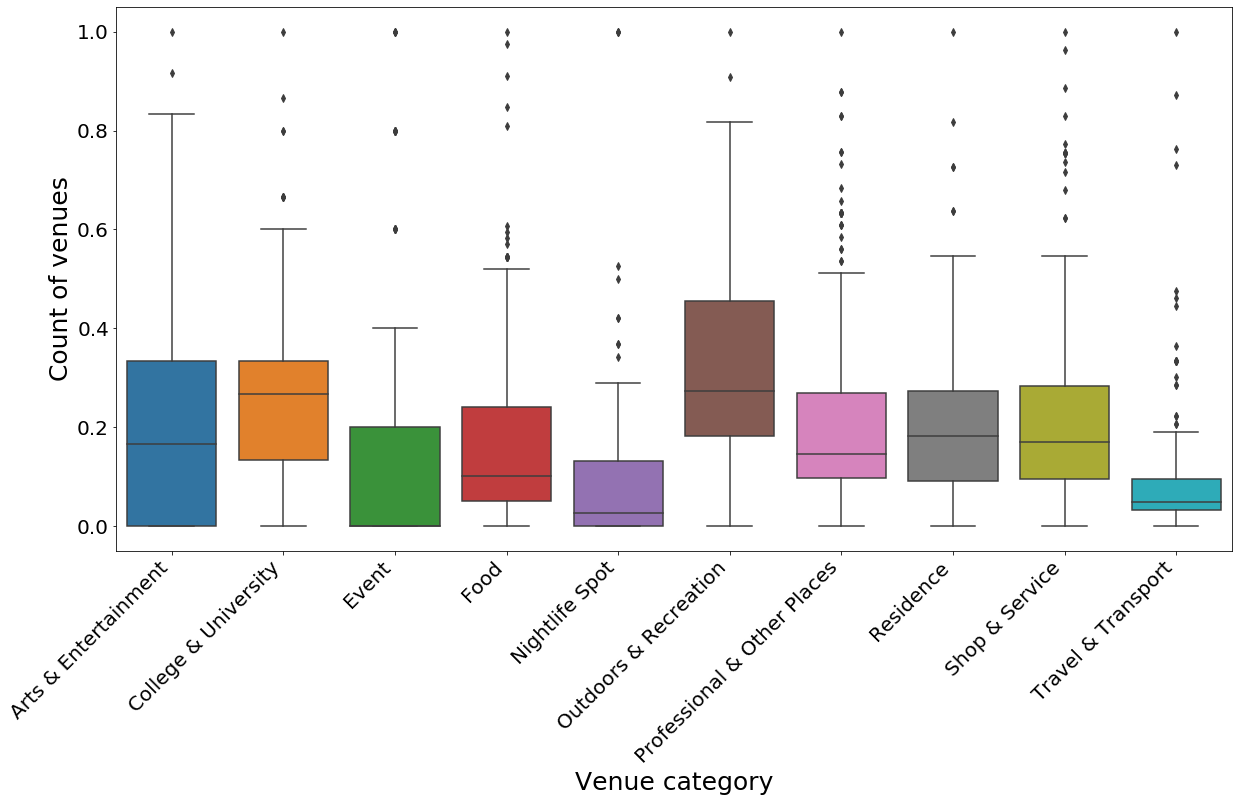

In [35]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

## Clustering using KMeans Clsutering

So we have the data and using an unsupervised clustering Algorithm known as KMeans Clusteing we will Create clusters.
To get started You may know that 'K' Means Numbers of clusters in which data is to be categorized. 
Now problem is we dont know how to evaluate the best K value so we will run the Kmeans algorithm on different values of K. Then we will use some measures or metrics to see which K value will be the most suitable.

First we will use the 'ELBOW METHOD' to check the most appropriate value of K.

In [37]:
from sklearn.cluster import KMeans 

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_df)
    Sum_of_squared_distances.append(km.inertia_)

Plotting the curve 

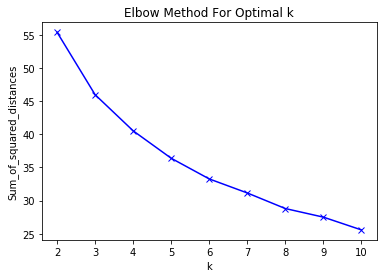

In [38]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We see that we cannot make clear prediction from the Elbow curve i.e a value of K after which sum_of_squared_distances is almost stable.

Next Let us try to use anothe method which is known as Silhoutte Score Method.

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
sil = []

kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2,kmax+1):
  kmeans = KMeans(n_clusters = k).fit(cluster_df)
  labels = kmeans.labels_
  sil.append(silhouette_score(cluster_df, labels, metric = 'euclidean'))

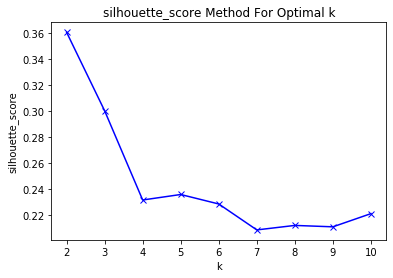

In [41]:
K1=range(2,kmax+1)
plt.plot(K1, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()

Here too we see that value of silhoutte score is max at cluster 2 but we know that we will need to create more than two clusters. Also because we cannot find a Global maxima we have a local maxima when the value of 4. So for our Clustering let us use K value as 4.

In [42]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
kmeans_labels

array([3, 3, 1, 2, 3, 1, 3, 0, 2, 3, 2, 1, 0, 3, 0, 2, 1, 2, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 3, 3, 3, 1, 0, 0, 2, 3, 3, 3, 2, 1, 3, 2, 2, 1, 1,
       1, 3, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 1, 3, 0, 3, 3, 2, 1,
       3, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1,
       0, 3, 3, 2, 1, 3, 1, 1, 3, 3, 1, 2, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 2, 3, 2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 0, 2, 0, 1, 0, 3, 0, 1, 3,
       1, 3, 2, 1, 1, 1, 3, 0, 3, 1, 2, 3, 3, 3, 2, 3, 3, 0, 1, 3, 1, 3,
       3])

In [43]:
(unique, counts) = np.unique(kmeans_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[ 0 22]
 [ 1 81]
 [ 2 29]
 [ 3 89]]


After seeing the frequency of values for each cluster we can replace the labels in Descending order of No. of stations. i.e count.

In [44]:
replace_labels = {0:3,1:1,2:2,3:0}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = stations_venues.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['Station'] = stations_venues['Station']
stations_clusters_minmax_df['Latitude'] = stations_venues['Latitude']
stations_clusters_minmax_df['Longitude'] = stations_venues['Longitude']

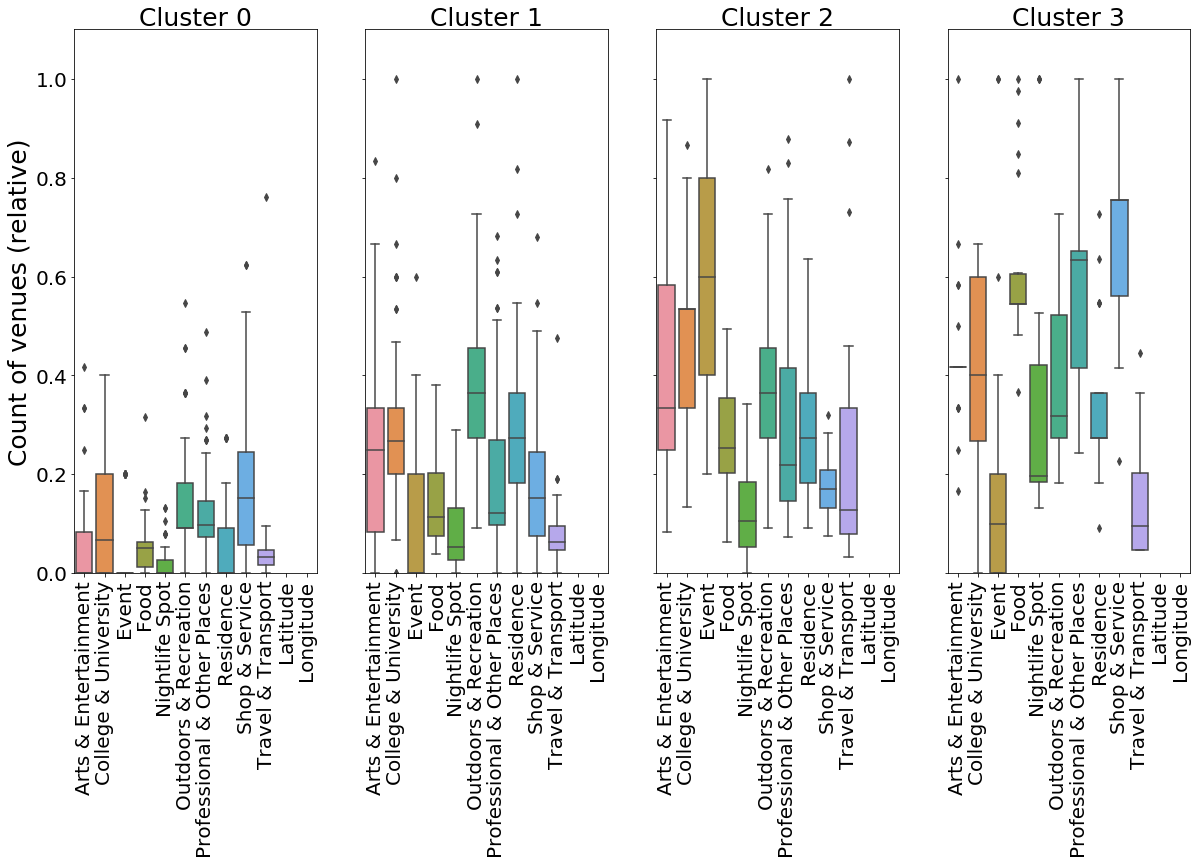

In [45]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

Before analyzing the Box-Plot above let us create a map of clustered station using folium.

In [47]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [48]:

cluster_map_delhi = folium.Map(location=[28.6517178,77.2219388], zoom_start=10)


#adding markers
for i, station, lat,long, cluster in zip(stations_clusters_minmax_df.index,
                                         stations_clusters_minmax_df['Station'],
                                         stations_clusters_minmax_df['Latitude'],
                                         stations_clusters_minmax_df['Longitude'],
                                         stations_clusters_minmax_df['Cluster']):
        
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','orange','red','yellow','cyan','pink']
    # Calculate top 3 categories for each station
    station_series = stations_clusters_minmax_df.iloc[i]
    top_categories_dict = {}
    for cat in categories_list:
        top_categories_dict[cat[0]] = station_series[cat[0]]
    top_categories = sorted(top_categories_dict.items(), key = lambda x: x[1], reverse=True)
    popup='<b>{}</b><br>Cluster {}<br>1. {} {}<br>2. {} {}<br>3. {} {}'.format(
        station,
        cluster,
        top_categories[0][0],
        "{0:.2f}".format(top_categories[0][1]),
        top_categories[1][0],
        "{0:.2f}".format(top_categories[1][1]),
        top_categories[2][0],
        "{0:.2f}".format(top_categories[2][1]))
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=5,
        color=colors[cluster]
    ).add_to(cluster_map_delhi)
cluster_map_delhi.save('Cluster_DMRC_Stations.html')
cluster_map_delhi

## Results and Insights from Clusters and Plots

Here is how we can characterize the clusters by looking at venue scores

Cluster 0 (Blue) has consistently high scores for all venue categories. This is the most diversely developed part of the city
Cluster 1 (Green) has highest marks for Professional&Other Places. This is the business part of the city.
Cluster 2 (Orange) has lower marks with best scores in Profiessional, Residence and Shop&Service.
Cluster 3 (Red) has low marks across the board. These appear to be underdeveloped areas.
Plotting the clusters on a map shows us that

Cluster 0 is the oldest central part of the city
Cluster 1 is also downtown. Most of these stations are inside or near the Circle Line and have excellent transit accessibility.
Clusters 2 and 3 aren’t so clearly geographically distributed. Cluster 3 areas tend to be at the outskirts but some are more centrally located.

### Cluster 0 (Blue)

In [61]:
cluster_0= stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster']==0]
cluster_0

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,Latitude,Longitude
0,0.083333,0.066667,0.0,0.101266,0.026316,0.090909,0.121951,0.090909,0.377358,0.063492,0,Adarsh Nagar,28.714401,77.167288
1,0.166667,0.066667,0.0,0.063291,0.026316,0.272727,0.048780,0.272727,0.056604,0.047619,0,Ghitorni,28.493751,77.149187
4,0.000000,0.066667,0.0,0.025316,0.000000,0.090909,0.097561,0.090909,0.245283,0.047619,0,Jahangirpuri,28.725972,77.162658
6,0.000000,0.000000,0.0,0.025316,0.000000,0.000000,0.097561,0.000000,0.207547,0.047619,0,Samaypur Badli,28.744616,77.138265
9,0.000000,0.000000,0.0,0.025316,0.000000,0.181818,0.073171,0.090909,0.150943,0.047619,0,Rohini Sector 18,28.738348,77.139832
13,0.000000,0.066667,0.0,0.050633,0.026316,0.181818,0.097561,0.181818,0.150943,0.063492,0,Haiderpur,28.730121,77.149403
27,0.250000,0.200000,0.0,0.050633,0.052632,0.272727,0.097561,0.090909,0.113208,0.031746,0,Vidhan Sabha,28.686322,77.221727
28,0.000000,0.000000,0.0,0.012658,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0,Sultanpur,28.461658,76.870085
29,0.166667,0.066667,0.0,0.025316,0.000000,0.181818,0.146341,0.000000,0.075472,0.047619,0,Arjan Garh,28.480735,77.125762
34,0.000000,0.066667,0.0,0.088608,0.000000,0.363636,0.073171,0.181818,0.169811,0.063492,0,Azadpur,28.707657,77.175547


Data Analysis Shows that **Blue cluster/ Cluster 0** have high value in almost all the fields of College & University, Professional & Other Places, Outdoors & Recreation, Shops & Service and also in other categories for some stations. 

1. From the map, if we compare it with the Line station map we see that almost every Station on Red line falls in this cluster. 
2. Moreover, there are small patches in the north and south delhi region where there are many colleges of Delhi university and other institutions.

### Cluster 1 (GREEN)

In [62]:
cluster_1= stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster']==1]
cluster_1

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,Latitude,Longitude
2,0.250000,0.133333,0.4,0.215190,0.052632,0.272727,0.317073,0.363636,0.075472,0.031746,1,Jor Bagh,28.588239,77.216528
5,0.500000,0.200000,0.0,0.075949,0.078947,0.363636,0.170732,0.181818,0.113208,0.079365,1,INA,28.574408,77.210241
11,0.333333,0.400000,0.2,0.265823,0.210526,0.363636,0.439024,0.272727,0.150943,0.095238,1,Hauz Khas,28.544256,77.206707
16,0.166667,0.400000,0.0,0.215190,0.026316,0.636364,0.146341,0.363636,0.000000,0.031746,1,GTB Nagar,28.698132,77.206411
19,0.166667,0.333333,0.0,0.075949,0.052632,0.181818,0.146341,0.272727,0.075472,0.047619,1,Civil Lines,28.676851,77.225030
20,0.083333,0.133333,0.0,0.139241,0.026316,0.363636,0.268293,0.272727,0.132075,0.063492,1,Model Town,28.702714,77.193991
21,0.416667,0.133333,0.0,0.063291,0.026316,0.090909,0.121951,0.272727,0.169811,0.095238,1,Chhatarpur,28.506724,77.175002
23,0.500000,0.800000,0.0,0.253165,0.026316,1.000000,0.146341,0.181818,0.207547,0.095238,1,Chandni Chowk,28.660504,77.229780
26,0.083333,0.466667,0.0,0.113924,0.000000,0.272727,0.097561,0.272727,0.226415,0.079365,1,Vishwa Vidyalaya,28.695037,77.214719
30,0.250000,0.266667,0.0,0.113924,0.131579,0.363636,0.121951,0.000000,0.188679,0.079365,1,Lok Kalyan Marg,28.598385,77.202996


Data Analysis Shows that **Green cluster/ Cluster 1** have high value in almost all the fields of Residence, Professional & Other Places, Outdoors & Recreation, Arts & Entertainment , Shops & Services and College & University than other categories.

1. From the map, We see that stations like Jor Bagh, Civil Lines and many other places which are considered to be Posh or are Residential areas are in this cluster.
2. Talking about shops and services some Famous Market areas like Chandni Chowk, Sarojini Nagar etc. are present in this cluster. 
3. Moreover, there are Many places of Recreation and outdoors like Hauz Khas, Chhatarpur, Kalkaji, Akshardham etc. are clustered in this cluster.

### CLUSTER 2 (YELLOW)

In [63]:
cluster_2= stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster']==2]
cluster_2

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,Latitude,Longitude
3,0.166667,0.333333,0.4,0.455696,0.236842,0.090909,0.146341,0.090909,0.169811,1.000000,2,New Delhi,28.643642,77.221737
8,0.583333,0.133333,0.4,0.379747,0.263158,0.363636,0.439024,0.454545,0.150943,0.111111,2,IFFCO Chowk,28.472328,77.072422
10,0.250000,0.200000,0.6,0.354430,0.105263,0.454545,0.829268,0.363636,0.094340,0.206349,2,HUDA City Centre,28.459343,77.072657
15,0.333333,0.400000,0.6,0.113924,0.236842,0.545455,0.560976,0.272727,0.094340,0.142857,2,Guru Dronacharya,28.482021,77.102269
17,0.250000,0.400000,0.6,0.430380,0.342105,0.454545,0.414634,0.363636,0.094340,0.095238,2,Green Park,28.558581,77.206718
22,0.833333,0.666667,0.8,0.240506,0.078947,0.454545,0.219512,0.363636,0.169811,0.111111,2,Chawri Bazar,28.650160,77.229501
24,0.333333,0.533333,0.8,0.113924,0.210526,0.454545,0.878049,0.272727,0.094340,0.222222,2,Central Secretariat,28.615879,77.212282
25,0.333333,0.200000,0.6,0.240506,0.157895,0.090909,0.268293,0.272727,0.113208,0.079365,2,AIIMS,28.566860,77.207806
33,0.250000,0.533333,1.0,0.063291,0.026316,0.363636,0.585366,0.181818,0.075472,0.031746,2,Udyog Bhawan,28.610530,77.213108
37,0.583333,0.533333,0.8,0.253165,0.052632,0.272727,0.097561,0.363636,0.188679,0.333333,2,Kashmere Gate,28.651718,77.221939


Data Analysis Shows that Yellow cluster/ Cluster 2 have high value in almost all the fields of Event, Residence, Outdoors & Recreation, Arts & Entertainment , Travel & Transport than other categories.

1. Analysis shows us that this cluster is geographically centered at almost central part of Delhi and including stations like Kashmere Gate, Welcome which have interchanges so mostly visited by people who travel alot and thats one of the reason there is more of Travel and Transport facility.
2. From the map, We see that there are important stations like AIIMS, Supreme Court in this cluster.
3. This actually shows that there is a need of continuous development in these areas. 

### CLUSTER 3 (RED)

In [64]:
cluster_3= stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster']==3]
cluster_3

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Station,Latitude,Longitude
7,0.666667,0.666667,0.2,0.607595,0.526316,0.363636,0.317073,0.545455,0.962264,0.190476,3,Saket,28.524411,77.213725
12,0.416667,0.266667,0.2,0.582278,0.421053,0.181818,1.000000,0.181818,0.226415,0.285714,3,Patel Chowk,28.622966,77.214031
14,0.416667,0.266667,1.0,0.911392,1.000000,0.636364,0.658537,0.181818,0.735849,0.444444,3,Rajiv Chowk,28.632780,77.219700
18,0.166667,0.466667,0.0,0.367089,0.236842,0.363636,0.878049,0.090909,0.433962,0.126984,3,Sikandarpur,28.481270,77.092999
31,0.583333,0.266667,0.2,0.848101,0.421053,0.727273,0.268293,0.363636,0.886792,0.158730,3,Malviya Nagar,28.533920,77.212447
32,0.333333,0.333333,0.4,0.481013,0.210526,0.363636,0.829268,0.636364,0.716981,0.047619,3,MG Road,28.479458,77.080465
61,0.583333,0.333333,0.2,0.810127,0.500000,0.545455,0.365854,0.545455,1.000000,0.206349,3,Shaheed Nagar,28.530780,77.212057
83,0.416667,0.600000,0.0,0.544304,0.184211,0.272727,0.634146,0.272727,0.754717,0.047619,3,Noida Sector 62,28.480863,77.084888
85,0.416667,0.600000,0.0,0.544304,0.184211,0.272727,0.634146,0.272727,0.754717,0.047619,3,Noida Sector 61,28.480863,77.084888
86,0.416667,0.600000,0.0,0.544304,0.184211,0.272727,0.634146,0.272727,0.754717,0.047619,3,Noida Sector 59,28.480863,77.084888


Data Analysis Shows that Red cluster/ Cluster 3 have high value in almost all the fields of Event, Nightlife, Outdoors & Recreation, Professional & Other Places, College & University than other categories.

Analysis shows us that this cluster consists of industrial and professional places like Faridabad, some Noida sectors. 

<hr>

## Discussions

Note that Foursquare data isn't very precise and accurate. The Foursquare counts for the venues that we can explore via Foursquare data. This doesn’t take into account other attributes that are essential and impotant to take while making clusters like Venue's size, services it provide, small shops or 'Rehdis' that are usually present almost everywhere. Moreover we do not take into account the Food while analysis as this is the attribute almost equal everywhere.

Also using Geocoder has some limitations in how accurate the geocoding of an address will be returned. There is also ambiguity with some places due to similar names or changes in names.

## Conclusion


Foursquare data is limited but can provide insights into a city’s development. This data could be combined with other sources to provide more accurate results.